In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer




In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### Data manipulation and cleanup

In [4]:
df = pd.read_csv('survey data.csv')

df

,variant,group,age,gender_1F_2M_3O,education_level,education_level_otherSpecification,income_level,Country_birth,English_proficiency,religion,religion_other_spec,meditation_freq,meditation_howlong,medit_type_silent,medit_type_voice,medit_type_breath,medit_type_body,medit_type_mindfulness,bg_medit_type_other,classicalPsych_frequency,TimeSinceLastClassicalPsych,Psychiatric_No_disclosure,Psychiatric_severe_depression,Psychiatric_bipolar,Psychiatric_psychosis,Psychiatric_anxiety,Psychiatric_ASD,Psychiatric_OCD,Psychiatric_ADHD,psychiatric_other,psychiatric_selfdiagnosed,substance_use_problem,ESP1_INV,2 ESP,3 ESP,4 ESP,exp_LSD,exp_psilocybin,exp_ayahuasca,exp_DMT,exp_5meoDMT,exp_mescaline,exp_ibogaine,exp_salvia,exp_mdma,exp_ketamine,exp_cannabis,other_drug_dummy,exp_other_drug,how_many_drugs,exp_drug_dose,exp_drug_dose_specific,exp_drug_intensity,exp_drug_confidence,exp_medit_silent,exp_medit_voice,exp_medit_breath,exp_medit_body,exp_medit_mindfulness,exp_other_medit,exp_meditation_technique_specific,exp_medit_drug,exp_medit_drugSpecification,exp_when,exp_where,exp_who,exp_guide,exp_purpose_nospecific,exp_purpose_relax_enjoy,exp_purpose_spiritual,exp_purpose_therapeutic,exp_purpose_curiosity,exp_purpose_social,exp_purpose_selfimprovement,exp_purpose_distraction,exp_purpose_other,exp_other_purpose,exp_planned,exp_expect,exp_drug_meditation,exp_drug_medit_silent,exp_drug_medit_voice,exp_drug_medit_breath,exp_drug_medit_body,exp_drug_medit_mindfulness,exp_drug_medit_otherSpecify,Open_report,Open_report typo-corrected,open_report_characters,body_yes_no,Thematic_body,insight_yes_no,Thematic_insights,connection_or_alienation_yes_no,Thematic_connection,preposts_satisfied,preposts_positive,preposts_negative,preposts_meaning,preposts_peace_harmony,prepost_bodydissat,prepost_bodyappre,prepost_embodiment,MEQ30_Q1_mystical,MEQ30_Q2_mystical,MEQ30_Q3_mystical,MEQ30_Q4_mystical,MEQ30_Q5_mystical,MEQ30_Q6_mystical,MEQ30_Q7_mystical,MEQ30_Q8_mystical,MEQ30_Q9_mystical,MEQ30_Q10_mystical,MEQ30_Q11_mystical,MEQ30_Q12_mystical,MEQ30_Q13_mystical,MEQ30_Q14_mystical,MEQ30_Q15_mystical,MEQ30_Q16_positive_mood,MEQ30_Q17_positive_mood,MEQ30_Q18_positive_mood,MEQ30_Q19_positive_mood,MEQ30_Q20_positive_mood,MEQ30_Q21_positive_mood,MEQ30_Q22_transcendence,MEQ30_Q23_transcendence,MEQ30_Q24_transcendence,MEQ30_Q25_transcendence,MEQ30_Q26_transcendence,MEQ30_Q27_transcendence,MEQ30_Q28_ineffability,MEQ30_Q29_ineffability,MEQ30_Q30_ineffability,MEQ30_sum,WEMWBS_optimistic,WEMWBS_useful,WEMWBS_relaxed,WEMWBS_dealing_w_problems,WEMWBS_thinking_clearly,WEMWBS_close_to_others,WEMWBS_make_up_my_own_mind,PoMS_1,PoMS_2,PoMS_3,PoMS_4,PoMS_5_INV,PoMS_6,PoMS_7_INV,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,BAS8,BAS9,BAS10,psy_flex1,psy_flex2,psy_flex3,psy_flex4,psy_flex5,psy_flex6,SVS_1_Power,userid
0,med1,meditation,64,2,4,NaN,2,Sweden,1,3,NaN,6,6,0,0,0,0,1,NaN,3,0,0,0,0,0,1,0,0,0,NaN,NaN,999,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,"Anapana, vipassana",1.0,NaN,6,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a fundamental concept in Buddhism cal...,There is a fundamental concept in Buddhism cal...,408,1,I went into this in the previous question.,1,A deep understanding of what anicca means.,3,NaN,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,47.0,4,4,4,4,4,4,4,3,3,3,3,2,3,1,3,3,4,3,4,2,2,2,3,2,5,5,4,4,4,4,7,6097026029595349a
1,med1,meditation,31,2,7,NaN,4,India,1,5,NaN,4,5,0,0,0,0,1,Vipassana,0,0,0,0,0,0,0,0,0,0,NaN,Mild anxiety,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Vipassana,1.0,NaN,7,5,3,1,0,0,1,0,0,0,0,0,0,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I developed all positive feelings. All thought...,I developed all positive feelings. All thought...,158,3,NaN,1,I realized I love my family. I realized that I...,2,NaN,3.0,5.0,

In [102]:
# Saving a csv file for parallel analysis with GPT-4
df[['group', 'Open_report typo-corrected']].to_csv('open_report_for_gpt4.csv', index=False)


In [5]:
df['MEQ30_mystical_sum'] = df['MEQ30_Q1_mystical'] + df['MEQ30_Q2_mystical'] + df['MEQ30_Q3_mystical'] + df['MEQ30_Q4_mystical'] + df['MEQ30_Q5_mystical'] + df['MEQ30_Q6_mystical'] + df['MEQ30_Q7_mystical'] + df['MEQ30_Q8_mystical'] + df['MEQ30_Q9_mystical'] + df['MEQ30_Q10_mystical'] + df['MEQ30_Q11_mystical'] + df['MEQ30_Q12_mystical'] + df['MEQ30_Q13_mystical'] + df['MEQ30_Q14_mystical'] + df['MEQ30_Q15_mystical']
df['MEQ30_positive_mood_sum'] = df['MEQ30_Q16_positive_mood'] + df['MEQ30_Q17_positive_mood'] + df['MEQ30_Q18_positive_mood'] + df['MEQ30_Q19_positive_mood'] + df['MEQ30_Q20_positive_mood'] + df['MEQ30_Q21_positive_mood']
df['MEQ30_transcendence_sum'] = df['MEQ30_Q22_transcendence'] + df['MEQ30_Q23_transcendence'] + df['MEQ30_Q24_transcendence'] + df['MEQ30_Q25_transcendence'] + df['MEQ30_Q26_transcendence'] + df['MEQ30_Q27_transcendence']
df['MEQ30_ineffability_sum'] = df['MEQ30_Q28_ineffability'] + df['MEQ30_Q29_ineffability'] + df['MEQ30_Q30_ineffability']

 
print(df['MEQ30_mystical_sum'].mean())
print(df['MEQ30_positive_mood_sum'].mean())
print(df['MEQ30_transcendence_sum'].mean())
print(df['MEQ30_ineffability_sum'].mean())


print(df['MEQ30_mystical_sum'].max())
print(df['MEQ30_positive_mood_sum'].max())
print(df['MEQ30_transcendence_sum'].max())
print(df['MEQ30_ineffability_sum'].max())


total_max_score = df['MEQ30_mystical_sum'].max() + df['MEQ30_positive_mood_sum'].max() + df['MEQ30_transcendence_sum'].max() + df['MEQ30_ineffability_sum'].max()
print(total_max_score)

# Threshold values for complete mystical experience on each subscale

threshold_mystical = df['MEQ30_mystical_sum'].max() * 0.6
threshold_positive_mood = df['MEQ30_positive_mood_sum'].max() * 0.6
threshold_transcendence = df['MEQ30_transcendence_sum'].max() * 0.6
threshold_ineffability = df['MEQ30_ineffability_sum'].max() * 0.6

print(threshold_mystical)
print(threshold_positive_mood)
print(threshold_transcendence)
print(threshold_ineffability)



47.31794871794872
21.102564102564102
17.21025641025641
10.77948717948718
75.0
30.0
30.0
15.0
150.0
45.0
18.0
18.0
9.0


In [6]:
df['complete_mystical_experience'] = np.where(
    (df['MEQ30_mystical_sum'] > threshold_mystical) &
    (df['MEQ30_positive_mood_sum'] > threshold_positive_mood) &
    (df['MEQ30_transcendence_sum'] > threshold_transcendence) &
    (df['MEQ30_ineffability_sum'] > threshold_ineffability), 1, 0)


In [7]:
total_participants = df.shape[0]
complete_mystical_experience_count = df['complete_mystical_experience'].sum()
proportion_complete_mystical_experience = complete_mystical_experience_count / total_participants
print(f"Proportion of participants with a complete mystical experience: {proportion_complete_mystical_experience}")


Proportion of participants with a complete mystical experience: 0.3145539906103286


In [8]:
# Only keeping the columns that we need

columns_to_keep = ['group', 'Open_report typo-corrected', 'MEQ30_sum', 'complete_mystical_experience']

df = df[columns_to_keep] 

df

,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience
0,meditation,There is a fundamental concept in Buddhism cal...,47.0,0
1,meditation,I developed all positive feelings. All thought...,45.0,0
2,meditation,I had recently lost my father unexpectedly. A ...,147.0,1
3,meditation,There was an objective experience of the self ...,74.0,0
4,meditation,Deep abiding peace with understanding of the i...,109.0,1
...,...,...,...,...
208,psychedelics,"It's impossible to write down what happened, a...",126.0,1
209,psychedelics,You are okay I took approximately half of what...,84.0,0
210,psychedelics,There was an intention setting and intake appt...,111.0,1
211,psychedelics,My memory is quite vague as it was almost 5 ye...,133.0,1


In [9]:
df['MEQ30_sum'] = df['MEQ30_sum'].fillna(0)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/310116978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MEQ30_sum'] = df['MEQ30_sum'].fillna(0)


In [10]:
# Dropping rows where open report is empty
df = df.dropna(subset=['Open_report typo-corrected'])

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   group                         203 non-null    object 
 1   Open_report typo-corrected    203 non-null    object 
 2   MEQ30_sum                     203 non-null    float64
 3   complete_mystical_experience  203 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [12]:
df['group'] = df['group'].astype('category')
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/3570789679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/3570789679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')


In [13]:
# Creating separate dataframes for psychedelics and meditation groups

psyke = df[df['group']=='psychedelics']

medi = df[df['group']=='meditation']

psyke_count = len(psyke)
medi_count = len(medi)

print(f"Number of answers in 'psychedelics' group: {psyke_count}")
print(f"Number of answers in 'meditation' group: {medi_count}")

Number of answers in 'psychedelics' group: 138
Number of answers in 'meditation' group: 65


### Checking word distributions

In [14]:
total_words = df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).sum()
print(f"Total number of words in 'Open_report typo-corrected': {total_words}")


Total number of words in 'Open_report typo-corrected': 72996


<Axes: >

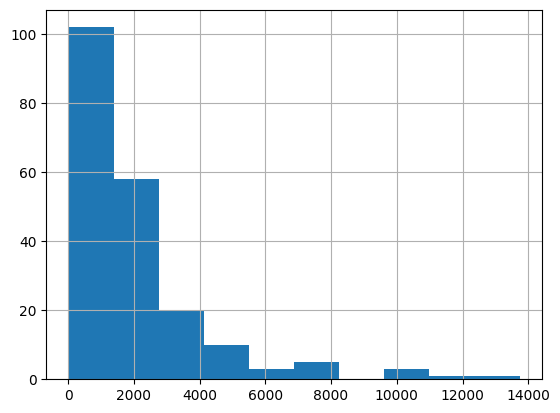

In [15]:
# Histogram of the answer lengths (in tokens)

df['Open_report typo-corrected'].str.len().hist()

<Axes: >

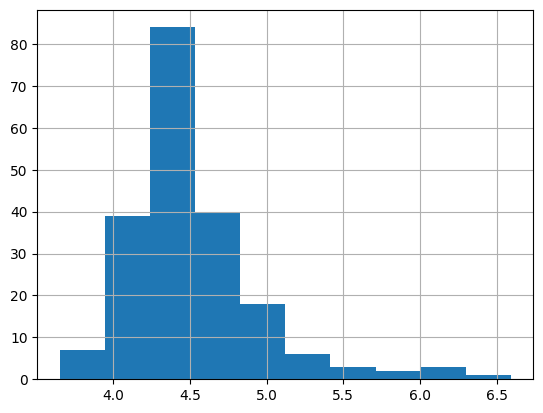

In [16]:
# Histogram of word lengths

df['Open_report typo-corrected'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Text(0, 0.5, 'Count of Answers')

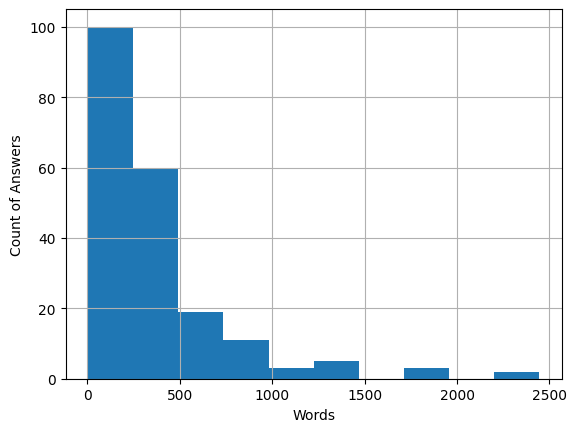

In [17]:
# Histogram of answer lengths (in words)

ax = df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).hist()
ax.set_xlabel("Words")
ax.set_ylabel("Count of Answers")


In [18]:
# Average length of the documents for all groups
avg_answer_length = round(df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length = round(df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for all groups: {avg_answer_length} (std: {std_answer_length})")

# Average length of the documents for 'psychedelics' group
avg_answer_length_psyke = round(psyke['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length_psyke = round(psyke['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for 'psychedelics' group: {avg_answer_length_psyke} (std: {std_answer_length_psyke})")

# Average length of the documents for 'meditation' group
avg_answer_length_medi = round(medi['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length_medi = round(medi['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for 'meditation' group: {avg_answer_length_medi} (std: {std_answer_length_medi})")


Average length of answers in words for all groups: 359.59 (std: 401.19)
Average length of answers in words for 'psychedelics' group: 400.41 (std: 443.66)
Average length of answers in words for 'meditation' group: 272.92 (std: 274.63)


<BarContainer object of 10 artists>

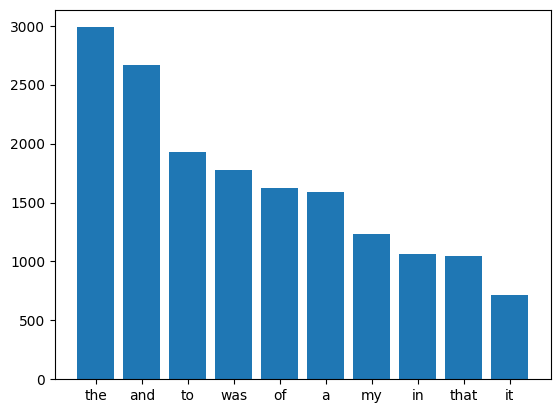

In [19]:
# Visualising the most common stopwords in the dataset
stop_words = set(stopwords.words('english'))

corpus = []
words = df['Open_report typo-corrected'].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

Text(0.5, 1.0, "10 most common words excluding stopwords for combined 'psychedelics' and 'meditation' groups")

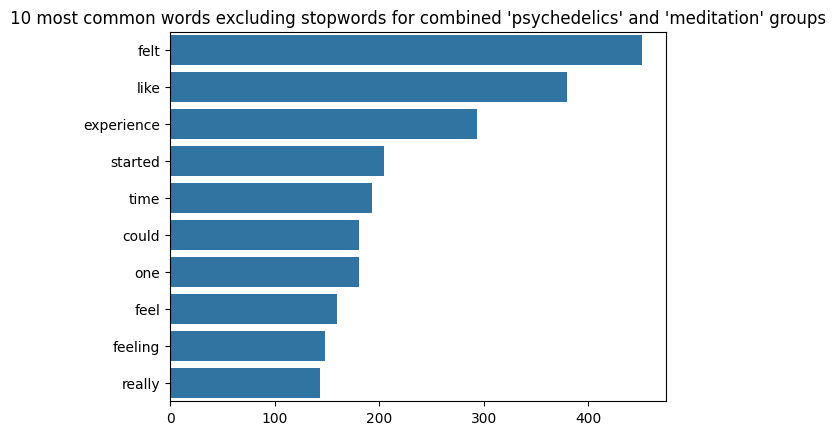

In [20]:
# Checking 10 most common words in the dataset excluding the stopwords for both 'psychedelics' and 'meditation' groups

from collections import  Counter


counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most:
    if (word.lower() not in stop_words):  # convert word to lowercase before checking
        x.append(word)
        y.append(count)
    if len(x) == 10:  # stop when we have found 10 words that are not stopwords
        break
        
sns.barplot(x=y,y=x).set_title("10 most common words excluding stopwords for combined 'psychedelics' and 'meditation' groups")


Text(0.5, 1.0, "10 most common words excluding stopwords for 'psychedelics' group")

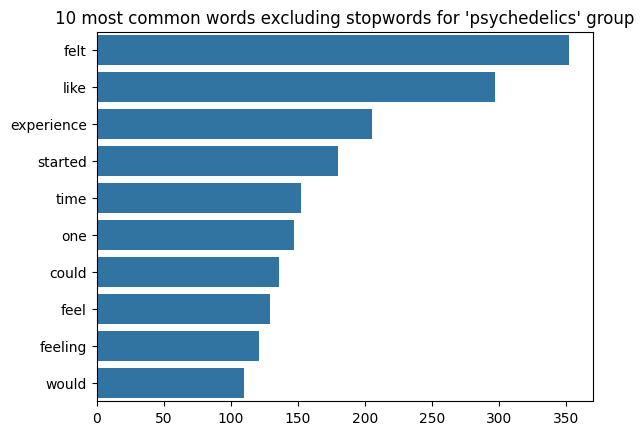

In [21]:
psyke_corpus = []
psyke_words = psyke['Open_report typo-corrected'].str.split()
psyke_words = psyke_words.values.tolist()
psyke_corpus = [word for i in psyke_words for word in i]

counter_psyke=Counter(psyke_corpus)
most_psyke=counter_psyke.most_common()
x_psyke, y_psyke=[], []
for word,count in most_psyke:
    if (word.lower() not in stop_words):  # convert word to lowercase before checking
        x_psyke.append(word)
        y_psyke.append(count)
    if len(x_psyke) == 10:  # stop when we have found 10 words that are not stopwords
        break
        
sns.barplot(x=y_psyke,y=x_psyke).set_title("10 most common words excluding stopwords for 'psychedelics' group")



In [22]:
# Importing spacy and a pre-trained english language model
import spacy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Model 'en_core_web_sm' not found. Downloading...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1850000

In [23]:
# Convert the corpus to a single string
psyke_text = ' '.join(psyke_corpus)

# Create a doc object
psyke_doc = nlp(psyke_text)

# Get the lemmatized words that are not stopwords or punctuation
psyke_words = [token.lemma_ for token in psyke_doc if not token.is_stop and not token.is_punct]

# Get the word frequencies
psyke_word_freq = Counter(psyke_words)

# Print the 20 most common words and their counts
psyke_word_freq.most_common(20)

[('feel', 569),
 ('experience', 388),
 ('like', 342),
 ('time', 241),
 ('start', 222),
 ('go', 175),
 ('life', 159),
 ('friend', 158),
 ('know', 144),
 ('think', 140),
 ('come', 134),
 ('trip', 134),
 ('take', 133),
 ('see', 129),
 ('thing', 114),
 ('get', 112),
 ('remember', 111),
 ('feeling', 107),
 ('body', 101),
 ('look', 101)]

Text(0.5, 1.0, "10 most common words excluding stopwords for 'meditation' group")

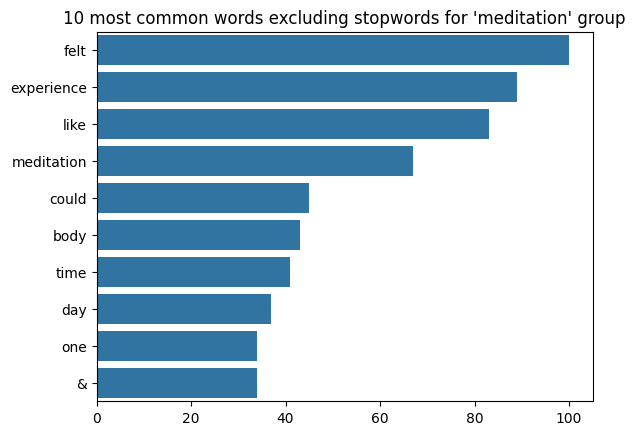

In [24]:
medi_corpus = []
medi_words = medi['Open_report typo-corrected'].str.split()
medi_words = medi_words.values.tolist()
medi_corpus = [word for i in medi_words for word in i]

counter_medi=Counter(medi_corpus)
most_medi=counter_medi.most_common()
x_medi, y_medi=[], []
for word,count in most_medi:
    if (word.lower() not in stop_words):  # convert word to lowercase before checking
        x_medi.append(word)
        y_medi.append(count)
    if len(x_medi) == 10:  # stop when we have found 10 words that are not stopwords
        break
        
sns.barplot(x=y_medi,y=x_medi).set_title("10 most common words excluding stopwords for 'meditation' group")

In [25]:
# Convert the corpus to a single string
medi_text = ' '.join(medi_corpus)

# Create a doc object
medi_doc = nlp(medi_text)

# Get the lemmatized words that are not stopwords or punctuation
medi_words = [token.lemma_ for token in medi_doc if not token.is_stop and not token.is_punct]

# Get the word frequencies
medi_word_freq = Counter(medi_words)

# Print the 20 most common words and their counts
medi_word_freq.most_common(20)

[('experience', 190),
 ('feel', 154),
 ('like', 91),
 ('meditation', 89),
 ('time', 80),
 ('body', 77),
 ('day', 69),
 ('practice', 58),
 ('retreat', 56),
 ('mind', 52),
 ('life', 50),
 ('know', 42),
 ('come', 38),
 ('year', 37),
 ('happen', 36),
 ('love', 36),
 ('start', 34),
 ('sense', 34),
 ('go', 34),
 ('sit', 32)]

### Most common ngrams

In [26]:
# Defining the functions for finding most common ngrams with and without stopwords

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

#Including stopwords
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


#Excluding stopwords
def get_top_ngram_without_stop(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [(word, count) for word, count in words_freq if all(w not in stop_words for w in word.split())]
    return words_freq[:10]



<Axes: >

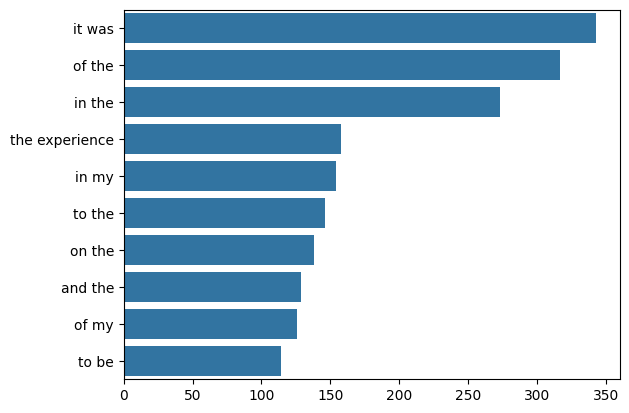

In [27]:
# Checking top bigrams with stopwords

top_n_bigrams=get_top_ngram(df['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

<Axes: >

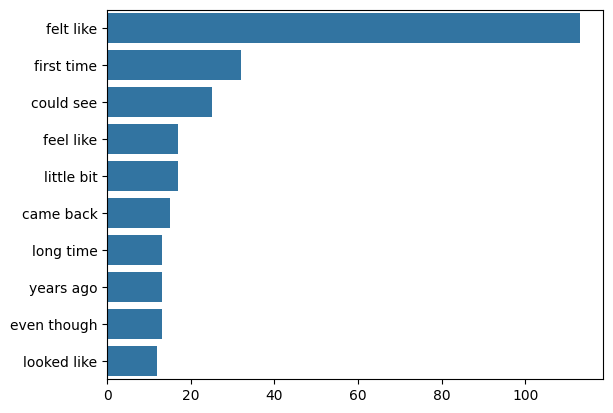

In [28]:
# Top bigrams without stopwords whole dataset
top_n_bigrams=get_top_ngram_without_stop(df['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Psychedelic group most common bigrams')

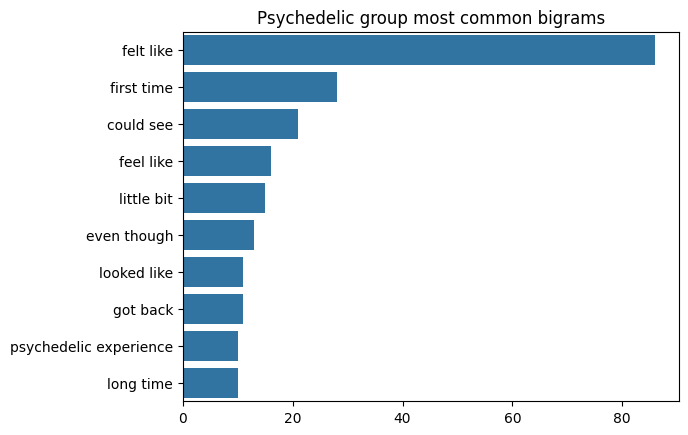

In [29]:
# Top bigrams without stopwords psychedelic group 
top_n_bigrams_psyke=get_top_ngram_without_stop(psyke['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams_psyke)) 

sns.barplot(x=y,y=x).set_title("Psychedelic group most common bigrams")


Text(0.5, 1.0, 'Meditation group most common bigrams')

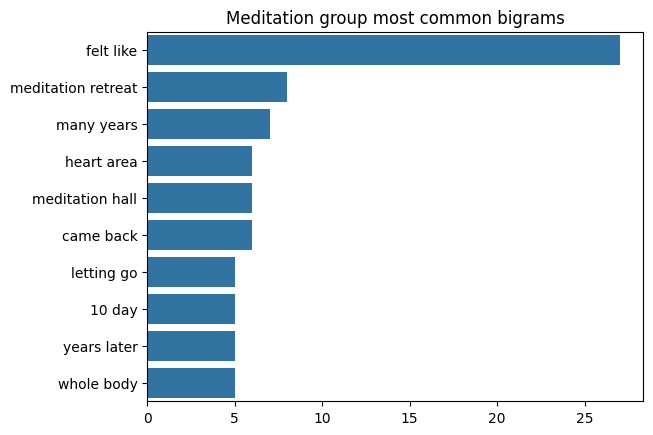

In [30]:
# Top bigrams without stopwords meditation group
top_n_bigrams_medi=get_top_ngram_without_stop(medi['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams_medi)) 

sns.barplot(x=y,y=x).set_title("Meditation group most common bigrams")

<Axes: >

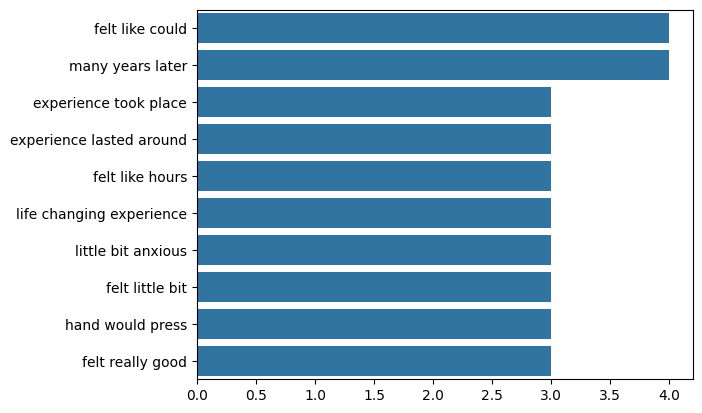

In [31]:
# Top trigrams without stopwords

top_tri_grams=get_top_ngram_without_stop(df['Open_report typo-corrected'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Psychedelic group most common trigrams')

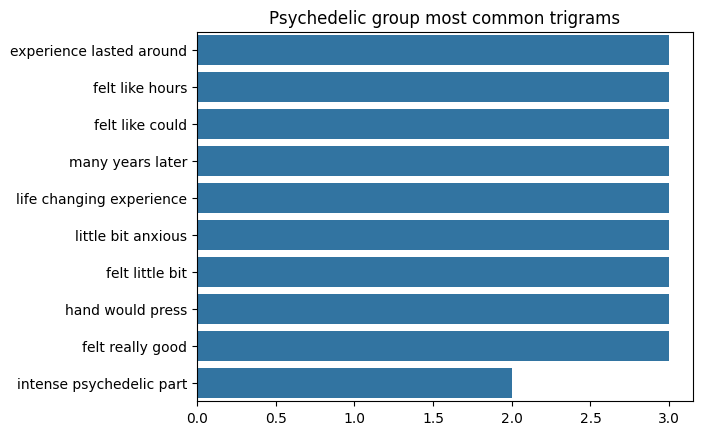

In [32]:
# Top trigrams without stopwords psychedelic group
top_n_trigrams_psyke=get_top_ngram_without_stop(psyke['Open_report typo-corrected'],3)[:10] 

x,y=map(list,zip(*top_n_trigrams_psyke)) 

sns.barplot(x=y,y=x).set_title("Psychedelic group most common trigrams")

Text(0.5, 1.0, 'Meditation group most common trigrams')

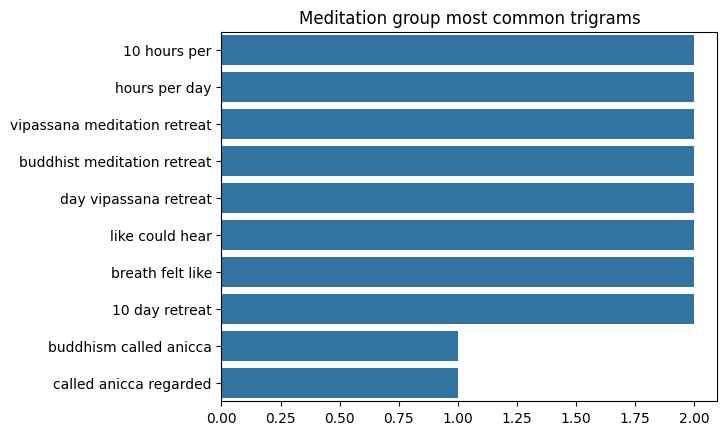

In [33]:
# Top bigrams without stopwords meditation group
top_n_trigrams_medi=get_top_ngram_without_stop(medi['Open_report typo-corrected'],3)[:10] 

x,y=map(list,zip(*top_n_trigrams_medi)) 

sns.barplot(x=y,y=x).set_title("Meditation group most common trigrams")

# TF-IDF analysis

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# Whole dataset
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(df['Open_report typo-corrected'])

# Psychedelic group
vectorizer_psyke = TfidfVectorizer(stop_words=list(stop_words))
X_psyke = vectorizer_psyke.fit_transform(psyke['Open_report typo-corrected'])

# Meditation group
vectorizer_medi = TfidfVectorizer(stop_words=list(stop_words))
X_medi = vectorizer_medi.fit_transform(medi['Open_report typo-corrected'])


In [35]:
def get_top_tfidf_words(vectorizer, tfidf_result, top_n):
    feature_names = vectorizer.get_feature_names_out()
    sorted_nzs = np.argsort(tfidf_result.data)[:-(top_n+1):-1]
    return feature_names[tfidf_result.indices[sorted_nzs]]

# Whole dataset
#print("Whole dataset top words:")
#print(get_top_tfidf_words(vectorizer, X, 20))

# Psychedelic group
print("Psychedelic group top words:")
print(get_top_tfidf_words(vectorizer_psyke, X_psyke, 20))

# Meditation group
print("Meditation group top words:")
print(get_top_tfidf_words(vectorizer_medi, X_medi, 20))


Psychedelic group top words:
['internal' 'achieve' 'snake' 'pleasure' 'fun' 'foreign' 'much' 'gf'
 'family' 'waves' 'desert' 'soul' 'painful' 'language' 'talk' 'happiness'
 'attacks' 'god' 'humans' 'sorry']
Meditation group top words:
['timelessness' 'calmness' 'ultimate' 'noted' 'lost' 'self' 'silence'
 'garden' 'created' 'felt' 'sense' 'wished' 'words' 'breath' 'earth' 'ego'
 'absolute' 'visible' 'extent' 'level']


# Using the spacy approach 

#### https://robertorocha.info/using-nlp-to-analyze-open-ended-responses-in-surveys/

In [36]:
all_text = df['Open_report typo-corrected'].str.cat(sep=' ')

doc = nlp(all_text, disable=['ner'])

In [37]:
# Checking most common words again excluding stopwords

words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(20)

[('feel', 723),
 ('experience', 578),
 ('like', 433),
 ('time', 321),
 ('start', 256),
 ('life', 209),
 ('go', 209),
 ('know', 186),
 ('body', 178),
 (' ', 177),
 ('come', 172),
 ('think', 171),
 ('friend', 169),
 ('day', 160),
 ('see', 153),
 ('take', 147),
 ('thing', 140),
 ('trip', 134),
 ('remember', 131),
 ('feeling', 130)]

In [38]:
# Most common verbs

verbs = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "VERB"]
verb_freq = Counter(verbs)
verb_freq.most_common(20)


[('feel', 719),
 ('start', 253),
 ('go', 209),
 ('know', 185),
 ('think', 171),
 ('come', 165),
 ('see', 153),
 ('take', 147),
 ('remember', 131),
 ('look', 121),
 ('get', 121),
 ('happen', 121),
 ('experience', 105),
 ('want', 102),
 ('try', 88),
 ('say', 84),
 ('sit', 76),
 ('find', 74),
 ('walk', 72),
 ('tell', 68)]

In [39]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(30)

[('first time', 32),
 ('same time', 16),
 ('little bit', 16),
 ('other people', 15),
 ('long time', 13),
 ('many years', 12),
 ('psychedelic experience', 10),
 ('whole body', 9),
 ('few hours', 9),
 ('next day', 8),
 ('few times', 8),
 ('present moment', 8),
 ('psychedelic experiences', 8),
 ('many times', 7),
 ('everyday life', 6),
 ('whole life', 6),
 ('whole universe', 6),
 ('several hours', 6),
 ('few days', 6),
 ('hard time', 6),
 ('whole experience', 5),
 ('first thing', 5),
 ('nervous system', 5),
 ('same thing', 5),
 ('ego death', 5),
 ('magic mushrooms', 5),
 ('total bliss', 5),
 ('mental health', 4),
 ('important part', 4),
 ('unconditional love', 4)]

In [40]:
# Showing adjectives that follow sentences "I/we feel/am/are"

feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc, as_spans=True) 

for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])

Counter(feel_adj).most_common(20)

[('sure', 8),
 ('able', 6),
 ('grateful', 6),
 ('whole', 3),
 ('same', 3),
 ('aware', 3),
 ('sub', 3),
 ('present', 2),
 ('enough', 2),
 ('different', 2),
 ('alone', 2),
 ('vivid', 2),
 ('connected', 2),
 ('lonely', 2),
 ('reborn', 2),
 ('middle', 2),
 ('licensed', 2),
 ('-', 2),
 ('tired', 1),
 ('healthy', 1)]

In [41]:
want_adj = []
matcher = Matcher(nlp.vocab) 

pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'LOWER': {'IN' : ['need', 'want']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'IS_ALPHA':True, 'OP':'?'}, {'POS':'NOUN'}]
   
matcher.add("WantPhrase", [pattern]) 
matches = matcher(doc, as_spans=True)

In [42]:
for match in matches:
    print(match.text)

I need more love
I really want salvation
I want my daughter
i want people
I want from life
we need advice


In [43]:
# Checking which words occur near the word "experience"

from spacy.matcher import PhraseMatcher

mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive

pattern = [nlp.make_doc('experience')]
matcher.add('experience', pattern) 
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start-10 : end+10]   
    mental_health_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 

Counter(mental_health_colloc).most_common(20)

[('experience', 478),
 ('feel', 62),
 (' ', 33),
 ('time', 32),
 ('like', 31),
 ('life', 29),
 ('psychedelic', 25),
 ('think', 21),
 ('happen', 21),
 ('way', 21),
 ('day', 20),
 ('change', 19),
 ('take', 19),
 ('feeling', 18),
 ('start', 17),
 ('go', 17),
 ('hour', 17),
 ('body', 16),
 ('trip', 15),
 ('year', 14)]

# Word frequency comparisons between the groups

In [44]:
psyke_all_text = psyke['Open_report typo-corrected'].str.cat(sep=' ')

psyke_doc = nlp(psyke_all_text, disable=['ner'])

In [45]:
medi_all_text = medi['Open_report typo-corrected'].str.cat(sep=' ')

medi_doc = nlp(medi_all_text, disable=['ner'])


In [97]:
psyke_words = [token.lemma_ for token in psyke_doc if not token.is_stop and not token.is_punct and token.lemma_ != ' '] 
psyke_word_freq = Counter(psyke_words) 
psyke_word_freq.most_common(20)

[('feel', 569),
 ('experience', 388),
 ('like', 342),
 ('time', 241),
 ('start', 222),
 ('go', 175),
 ('life', 159),
 ('friend', 158),
 ('know', 144),
 ('think', 140),
 ('come', 134),
 ('trip', 134),
 ('take', 133),
 ('see', 129),
 ('thing', 114),
 ('get', 112),
 ('remember', 111),
 ('feeling', 107),
 ('body', 101),
 ('look', 101)]

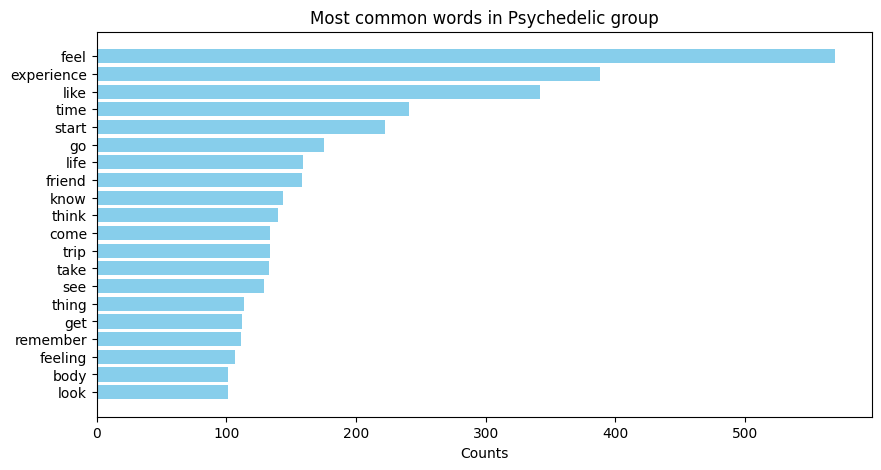

In [98]:
psyke_common_words = psyke_word_freq.most_common(20)
words, counts = zip(*psyke_common_words)

plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Counts')
plt.title('Most common words in Psychedelic group')
plt.gca().invert_yaxis()
plt.show()


In [99]:
medi_words = [token.lemma_ for token in medi_doc if not token.is_stop and not token.is_punct and token.lemma_ != ' '] 
medi_word_freq = Counter(medi_words) 
medi_word_freq.most_common(20)

[('experience', 190),
 ('feel', 154),
 ('like', 91),
 ('meditation', 89),
 ('time', 80),
 ('body', 77),
 ('day', 69),
 ('practice', 57),
 ('retreat', 56),
 ('mind', 52),
 ('life', 50),
 ('know', 42),
 ('come', 38),
 ('year', 37),
 ('happen', 36),
 ('love', 36),
 ('start', 34),
 ('sense', 34),
 ('go', 34),
 ('sit', 32)]

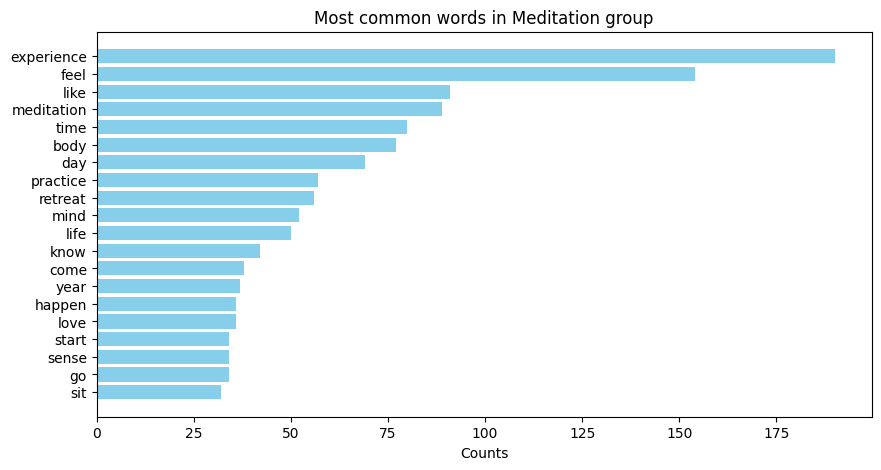

In [100]:
medi_common_words = medi_word_freq.most_common(20)
words, counts = zip(*medi_common_words)

plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Counts')
plt.title('Most common words in Meditation group')
plt.gca().invert_yaxis()
plt.show()


### Pre-processing the open answers by removing stopwords and lemmatising the words

In [49]:
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')

# Creating the pre-processing functions
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Defining a mapping of words to their base forms
manual_mapping = {
    'felt': 'feel',
    'talked': 'talk',
    'thought': 'think',
}

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [manual_mapping.get(token, token) for token in tokens] 
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/konsta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [50]:
# Pre-processing psyke and medi datasets

psyke_pre_processed_answers = psyke['Open_report typo-corrected'].apply(preprocess_text)
medi_pre_processed_answers = medi['Open_report typo-corrected'].apply(preprocess_text)



## TF-IDF analysis

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the tf-idf vectorizers
tfidf_vectorizer_psyke = TfidfVectorizer()
tfidf_vectorizer_medi = TfidfVectorizer()

# Apply the vectorizers to the preprocessed answers
X_psyke = tfidf_vectorizer_psyke.fit_transform(psyke_pre_processed_answers)
X_medi = tfidf_vectorizer_medi.fit_transform(medi_pre_processed_answers)



In [52]:
# Psychedelic group
print("Psychedelic group top words:")
print(get_top_tfidf_words(tfidf_vectorizer_psyke, X_psyke, 20))

# Meditation group
print("Meditation group top words:")
print(get_top_tfidf_words(tfidf_vectorizer_medi, X_medi, 20))

Psychedelic group top words:
['family' 'spirit' 'achieve' 'connection' 'snake' 'fun' 'much' 'pleasure'
 'foreign' 'gf' 'desert' 'soul' 'sorry' 'painful' 'attack' 'wave'
 'language' 'happiness' 'literal' 'nirvana']
Meditation group top words:
['timelessness' 'note' 'ultimate' 'calmness' 'self' 'lose' 'garden'
 'silence' 'feel' 'create' 'sense' 'ego' 'paper' 'breath' 'wish' 'extent'
 'rainbow' 'absolute' 'earth' 'visible']


Psychedelic group top words:


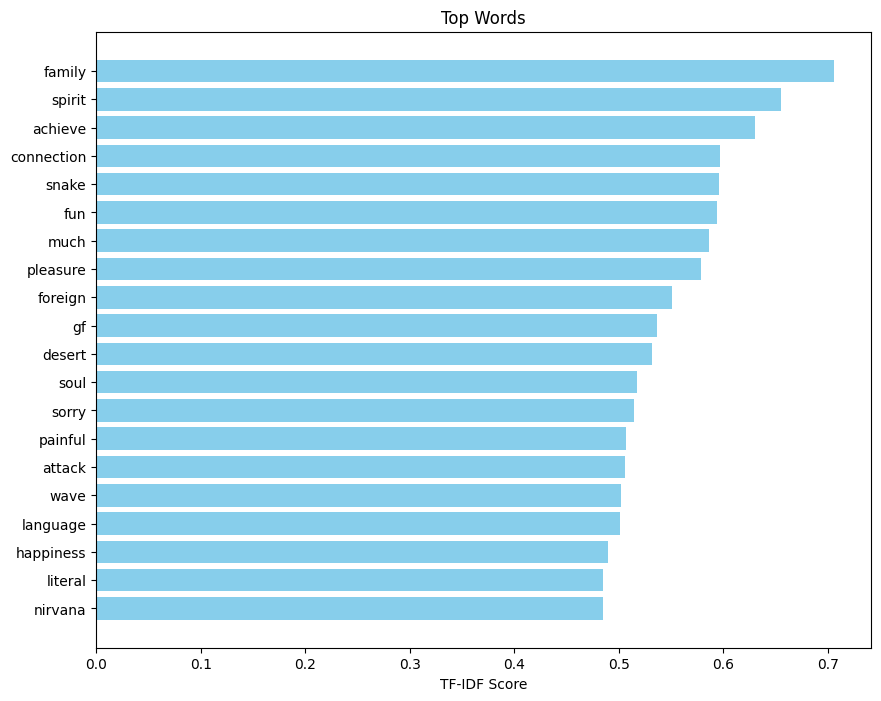

Meditation group top words:


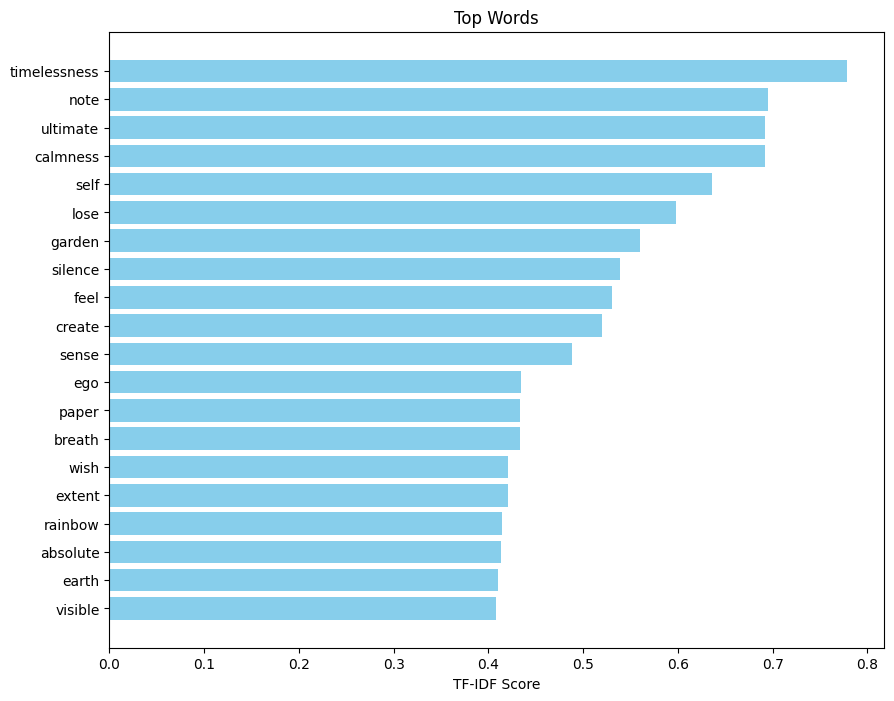

In [53]:

def plot_top_tfidf_words(vectorizer, tfidf_result, top_n):
    feature_names = vectorizer.get_feature_names_out()
    sorted_nzs = np.argsort(tfidf_result.data)[:-(top_n+1):-1]
    top_words = feature_names[tfidf_result.indices[sorted_nzs]]
    top_scores = tfidf_result.data[sorted_nzs]
    
    plt.figure(figsize=(10, 8))
    plt.barh(top_words, top_scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title('Top Words')
    plt.gca().invert_yaxis()
    plt.show()

# Psychedelic group
print("Psychedelic group top words:")
plot_top_tfidf_words(tfidf_vectorizer_psyke, X_psyke, 20)

# Meditation group
print("Meditation group top words:")
plot_top_tfidf_words(tfidf_vectorizer_medi, X_medi, 20)

Psychedelic group top words:


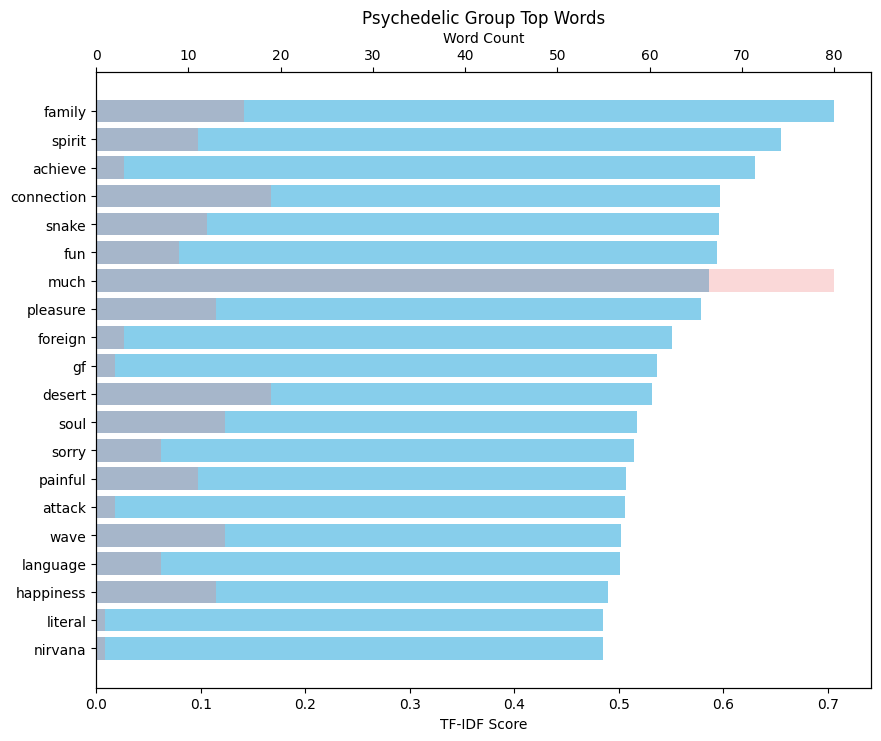

Meditation group top words:


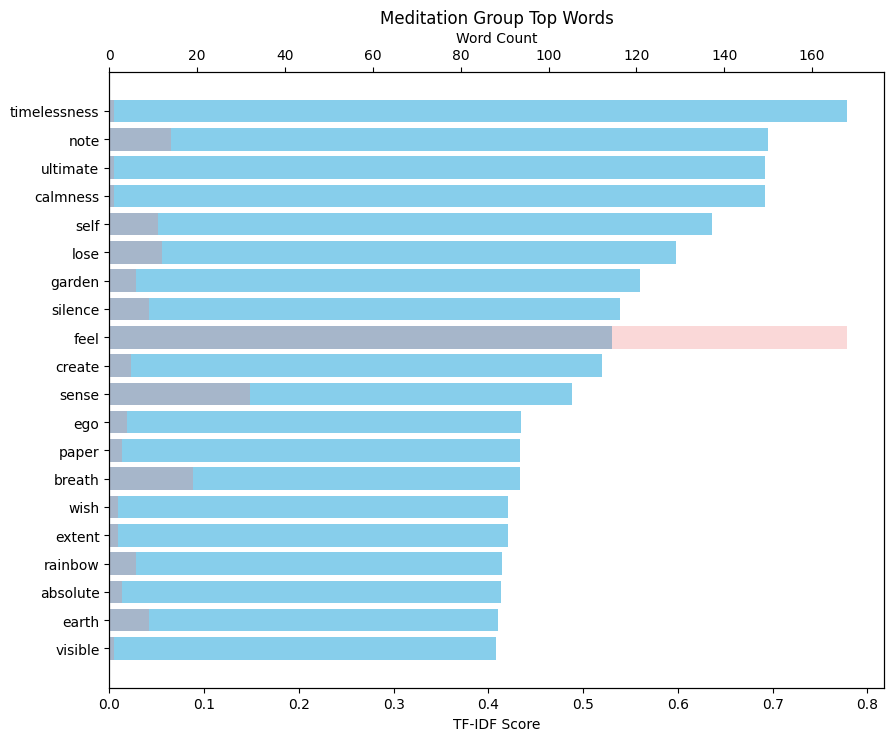

In [54]:
# Create the count vectorizers
count_vectorizer_psyke = CountVectorizer()
count_vectorizer_medi = CountVectorizer()

# Apply the vectorizers to the preprocessed answers
X_psyke_count = count_vectorizer_psyke.fit_transform(psyke_pre_processed_answers)
X_medi_count = count_vectorizer_medi.fit_transform(medi_pre_processed_answers)

def plot_top_tfidf_words(vectorizer, tfidf_result, count_vectorizer, count_result, top_n, title):
    feature_names = vectorizer.get_feature_names_out()
    sorted_nzs = np.argsort(tfidf_result.data)[:-(top_n+1):-1]
    top_words = feature_names[tfidf_result.indices[sorted_nzs]]
    top_scores = tfidf_result.data[sorted_nzs]
    
    # Get word counts
    word_counts = count_result.sum(axis=0).A1
    count_dict = dict(zip(count_vectorizer.get_feature_names_out(), word_counts))
    top_counts = [count_dict[word] for word in top_words]
    
    fig, ax1 = plt.subplots(figsize=(10, 8))

    # Plot TF-IDF scores
    ax1.barh(top_words, top_scores, color='skyblue')
    ax1.set_xlabel('TF-IDF Score')
    ax1.set_title(title)

    # Plot word counts on the same graph but with a different x-axis
    ax2 = ax1.twiny()
    ax2.barh(top_words, top_counts, color='lightcoral', alpha=0.3)
    ax2.set_xlabel('Word Count')

    # Invert y-axis
    plt.gca().invert_yaxis()
    plt.show()

# Psychedelic group
print("Psychedelic group top words:")
plot_top_tfidf_words(tfidf_vectorizer_psyke, X_psyke, count_vectorizer_psyke, X_psyke_count, 20, 'Psychedelic Group Top Words')

# Meditation group
print("Meditation group top words:")
plot_top_tfidf_words(tfidf_vectorizer_medi, X_medi, count_vectorizer_medi, X_medi_count, 20, 'Meditation Group Top Words')

# Topic analysis with LDA

### Testing the LDA model with different number of topics (k) and checking words inside the topic models 

In [55]:
# Psychedelic data

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Define the number of topics for each model
num_topics_list = [3, 5, 10, 15, 20, 25, 30]

# Vectorizing the preprocessed text and creating document-term matrices
vectorizer_psyke = CountVectorizer()
psyke_dtm = vectorizer_psyke.fit_transform(psyke_pre_processed_answers)

# Function to print top 10 words for each topic
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(psyke_dtm)
    print_top_words(lda_model, vectorizer_psyke)


Model with 3 topics:
Topic #1: feel, experience, like, go, time, one, could, take, would, start
Topic #2: experience, feel, like, time, trip, saw, go, get, could, life
Topic #3: feel, like, start, experience, time, go, friend, get, one, life

Model with 5 topics:
Topic #1: experience, feel, go, like, one, could, time, come, life, see
Topic #2: experience, god, like, could, see, feel, friend, think, saw, trip
Topic #3: feel, experience, start, make, like, one, body, friend, go, everything
Topic #4: experience, feel, time, hour, also, life, one, make, consciousness, note
Topic #5: feel, like, time, experience, start, go, get, take, could, friend

Model with 10 topics:
Topic #1: feel, go, like, come, experience, one, get, could, take, body
Topic #2: experience, god, impossible, like, color, trip, anything, another, see, boom
Topic #3: feel, like, experience, one, body, life, child, strong, try, everything
Topic #4: experience, reality, see, one, feel, way, lot, consciousness, life, back


In [56]:
# Meditation data

# Vectorize the preprocessed text
vectorizer_medi = CountVectorizer()
medi_dtm = vectorizer_medi.fit_transform(medi_pre_processed_answers)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model_medi = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model_medi.fit(medi_dtm)
    print_top_words(lda_model_medi, vectorizer_medi)


Model with 3 topics:
Topic #1: experience, meditation, note, think, day, feel, retreat, body, life, like
Topic #2: feel, experience, body, meditation, like, day, retreat, practice, time, go
Topic #3: experience, time, like, feel, mind, life, meditation, state, one, could

Model with 5 topics:
Topic #1: experience, time, day, intense, see, realize, breath, hearing, really, use
Topic #2: feel, experience, like, day, body, meditate, one, time, word, go
Topic #3: experience, time, mind, could, like, feel, life, state, nyams, yet
Topic #4: feel, experience, meditation, body, like, practice, retreat, life, day, could
Topic #5: time, experience, retreat, go, heart, feel, practice, happen, many, back

Model with 10 topics:
Topic #1: time, experience, intense, realize, day, use, breath, hearing, really, act
Topic #2: feel, experience, one, garden, use, state, go, time, calm, day
Topic #3: experience, time, different, level, mind, state, colour, something, rainbow, light
Topic #4: experience, f

### Final topic models for psychedelic and meditation groups
Defined by using the model from Wheeler et al. (2021): https://link.springer.com/chapter/10.1007/978-3-030-74772-5_24. However, with meditation group the article's recommendations are not followed (it suggests using only 2 topics for meditation), because I wanted to have same amount of topics for the both model, which also would make sense for human readers. Therefore, the k parameter is set to 5 with both datasets.

In [57]:
lda_model_psyke = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_psyke.fit(psyke_dtm)
print("Psychedelics:")
print_top_words(lda_model_psyke, vectorizer_psyke)

lda_model_medi = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_medi.fit(medi_dtm)
print("Meditation:")
print_top_words(lda_model_medi, vectorizer_medi)


Psychedelics:
Topic #1: experience, feel, go, like, one, could, time, come, life, see
Topic #2: experience, god, like, could, see, feel, friend, think, saw, trip
Topic #3: feel, experience, start, make, like, one, body, friend, go, everything
Topic #4: experience, feel, time, hour, also, life, one, make, consciousness, note
Topic #5: feel, like, time, experience, start, go, get, take, could, friend
Meditation:
Topic #1: experience, time, day, intense, see, realize, breath, hearing, really, use
Topic #2: feel, experience, like, day, body, meditate, one, time, word, go
Topic #3: experience, time, mind, could, like, feel, life, state, nyams, yet
Topic #4: feel, experience, meditation, body, like, practice, retreat, life, day, could
Topic #5: time, experience, retreat, go, heart, feel, practice, happen, many, back


### GPT-4 interpretation of the topics:

I didn't reveal to the model that it's about psychedelic and meditation experiences, so it should be relatively unbiased in that regard. 

Psychedelics:
1. General Experience: This topic seems to cover the general experience of an event or situation, including feelings and perceptions.
2. Spiritual Experience: This topic might be related to spiritual or transcendent experiences, as indicated by words like 'god' and 'saw'.
3. Physical and Emotional Experience: This topic could be about the physical and emotional sensations experienced during an event or situation.
4. Time Perception: This topic might be about the altered perception of time and consciousness during an experience.
5. Social Experience: This topic could be about the social aspect of an experience, including experiences with friends.

Meditation:
1. Intense Experience: This topic might be about intense or profound experiences, possibly involving sensory perceptions.
2. Body Awareness: This topic could be about the increased body awareness and feelings experienced during an activity, possibly meditation.
3. Mindfulness: This topic might be about the mindfulness aspect of an activity, including awareness of one's mind and life.
4. Meditation Practice: This topic could be about the practice of meditation itself, including retreats and daily practice.
5. Transformation: This topic might be about the transformative aspects of an activity, including changes in feelings and practices over time.

In [58]:
# Get the topic distribution for each document
topic_distribution = lda_model_psyke.transform(psyke_dtm)

# Convert the topic distribution to a DataFrame
topic_distribution_df = pd.DataFrame(topic_distribution, columns=[f'Topic_{i+1}' for i in range(lda_model_psyke.n_components)])

# Concatenate the original DataFrame with the topic distribution DataFrame
psyke_with_topics = pd.concat([psyke_pre_processed_answers.reset_index(drop=True), topic_distribution_df], axis=1)

psyke_with_topics

,Open_report typo-corrected,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,friend apartment take lsd let say fairly avera...,0.001758,0.001756,0.001751,0.001756,0.992979
1,mean last experience take ketamine experienced...,0.341885,0.003492,0.330796,0.003534,0.320294
2,first time eat mushroom get away depression ay...,0.015758,0.015500,0.015654,0.015671,0.937417
3,close friend take shrooms nice walk around tow...,0.006548,0.006617,0.006515,0.006624,0.973697
4,many testimonial experienced connection nature...,0.003454,0.003437,0.003525,0.003442,0.986143
5,first feel effect come like tiptoe around brai...,0.000791,0.000786,0.000789,0.000784,0.996850
6,vaporize dmt friend cottage feel super intense...,0.002410,0.287786,0.002392,0.002392,0.705020
7,introduce realm spirit always know even small ...,0.002542,0.573559,0.002541,0.002566,0.418792
8,kept journal experience best ability ate fresh...,0.000326,0.000324,0.000322,0.000322,0.998705
9,met helpful kind spirit short time spiritual p...,0.018553,0.018424,0.018449,0.337721,0.606852


In [59]:
# Calculate the average contribution of each topic
average_topic_contributions = topic_distribution_df.mean()

# Print the average contribution of each topic
print(average_topic_contributions)

Topic_1    0.127627
Topic_2    0.075198
Topic_3    0.138309
Topic_4    0.095120
Topic_5    0.563746
dtype: float64


/Users/konsta/Library/Caches/pypoetry/virtualenvs/data-and-analysis-W6Z4YzTc-py3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120574 (\N{MATHEMATICAL ITALIC SMALL GAMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


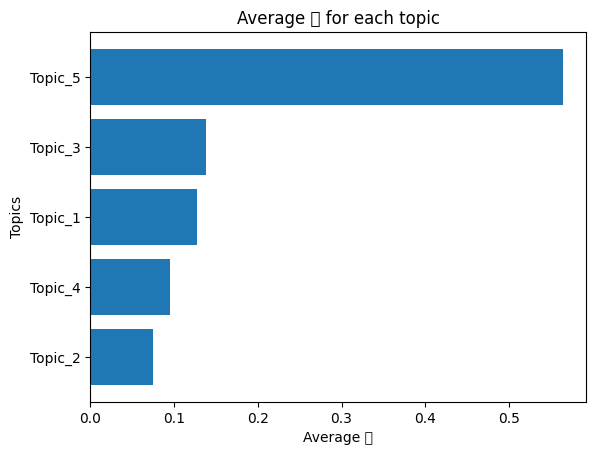

In [60]:
sorted_topics = average_topic_contributions.sort_values()
fig, ax = plt.subplots()
ax.barh(sorted_topics.index, sorted_topics.values)
ax.set_xlabel('Average 𝛾')
ax.set_ylabel('Topics')
ax.set_title('Average 𝛾 for each topic')
plt.show()



In [61]:
# # SOLVE THE ERROR LATER

# topics_with_words = []
# for i in range(lda_model_psyke.n_components):
#     top_words = ", ".join([feature_names[j] for j in sorted_topics[i, :n_top_words]])
#     gamma = np.sum(topic_contributions[i, sorted_topics[i, :n_top_words]])
#     topics_with_words.append({'Topic': f'Topic_{i+1}', 'Top Words': top_words, 'Gamma': gamma})

# topics_with_words_df = pd.DataFrame(topics_with_words)
# topics_with_words_df = topics_with_words_df.sort_values(by='Gamma', ascending=False)
# topics_with_words_df

In [62]:
# Psyke topics ordered by 𝛾

n_top_words = 10  # Define the number of top words to print
topic_contributions = lda_model_psyke.components_ / lda_model_psyke.components_.sum(axis=1)[:, np.newaxis]
topics_sorted = np.argsort(topic_contributions, axis=1)[:, ::-1]
feature_names = vectorizer_psyke.get_feature_names_out()  # Define feature names

# Print the topics, their top 10 words and the probability 𝛾
for i in range(lda_model_psyke.n_components):
    print(f"\nTopic #{i + 1}:")
    print(", ".join([feature_names[j] for j in topics_sorted[i, :n_top_words]]))
    print("𝛾:", np.sum(topic_contributions[i, topics_sorted[i, :n_top_words]]))




Topic #1:
experience, feel, go, like, one, could, time, come, life, see
𝛾: 0.07961130932162615

Topic #2:
experience, god, like, could, see, feel, friend, think, saw, trip
𝛾: 0.06330319286298729

Topic #3:
feel, experience, start, make, like, one, body, friend, go, everything
𝛾: 0.07675226051897094

Topic #4:
experience, feel, time, hour, also, life, one, make, consciousness, note
𝛾: 0.06679605523177015

Topic #5:
feel, like, time, experience, start, go, get, take, could, friend
𝛾: 0.12227706538161376


In [63]:
# # Save the outputs into a dataframe
# topics_df = pd.DataFrame(topic_contributions, columns=feature_names)

# # Visualise the results
# try:
#     fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size of the plot to avoid ValueError
#     topics_df.plot(kind='bar', stacked=True, ax=ax)
#     plt.title('Topic Contributions')
#     plt.xlabel('Topics')
#     plt.ylabel('Contributions')
#     plt.show()
# except ValueError as ve:
#     print("Error while plotting:", ve)



### Adding topics to the dataframes??? Is this useful?

In [64]:
# # Adding topic column to the dataframes
# psyke_topic_distribution = psyke_lda.transform(psyke_dtm)
# psyke['topic'] = psyke_topic_distribution.argmax(axis=1)

# medi_topic_distribution = medi_lda.transform(medi_dtm)
# medi['topic'] = medi_topic_distribution.argmax(axis=1)

# psyke.head(5)


# Sentiment analysis

In [65]:
psyke.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 66 to 212
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   group                         138 non-null    category
 1   Open_report typo-corrected    138 non-null    string  
 2   MEQ30_sum                     138 non-null    float64 
 3   complete_mystical_experience  138 non-null    int64   
dtypes: category(1), float64(1), int64(1), string(1)
memory usage: 4.6 KB


In [66]:
medi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   group                         65 non-null     category
 1   Open_report typo-corrected    65 non-null     string  
 2   MEQ30_sum                     65 non-null     float64 
 3   complete_mystical_experience  65 non-null     int64   
dtypes: category(1), float64(1), int64(1), string(1)
memory usage: 2.2 KB


### Unidimensional analysis using vaderSentiment

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the DataFrames
psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/3037653945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/3037653945.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


### Sentiment visualisation

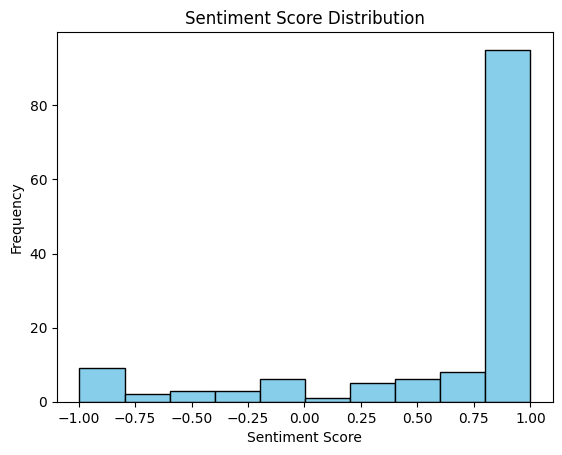

In [68]:
# Creating a sentiment histogram
plt.hist(psyke['Sentiment'], bins=10, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Show the plot
plt.show()

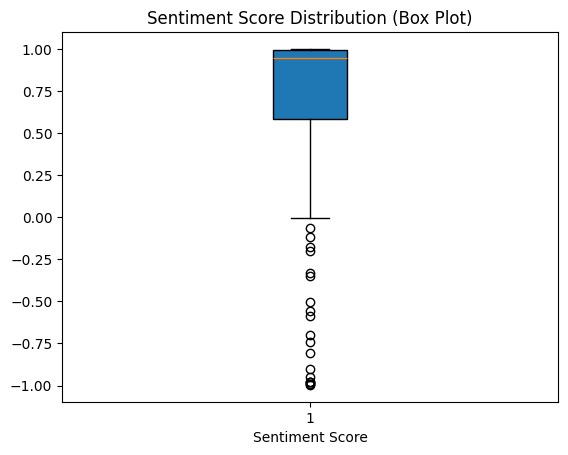

In [69]:
# Creating a box plot
plt.boxplot(psyke['Sentiment'], vert=True, patch_artist=True)

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

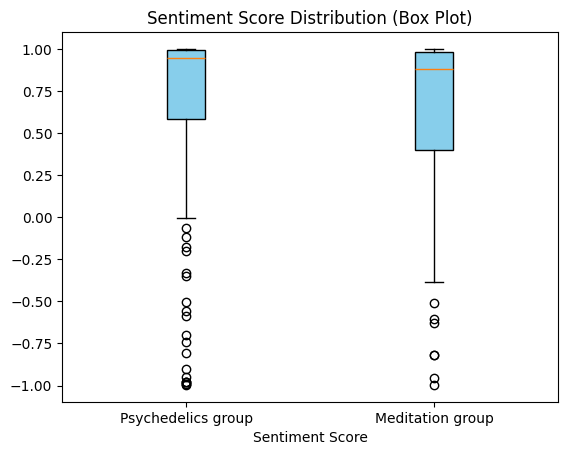

In [70]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create box plots for each DataFrame
boxplot1 = ax.boxplot(psyke['Sentiment'], vert=True, patch_artist=True, positions=[1], labels=['Psychedelics group'])
boxplot2 = ax.boxplot(medi['Sentiment'], vert=True, patch_artist=True, positions=[2], labels=['Meditation group'])

# Customize colors
colors = ['skyblue', 'lightcoral']
for box in [boxplot1, boxplot2]:
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

# Add labels and a title
ax.set_xlabel('Sentiment Score')
ax.set_title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

In [71]:
psyke_avg = round(psyke['Sentiment'].mean(), 2)
psyke_std = round(psyke['Sentiment'].std(), 2)

psyke_median = round(psyke['Sentiment'].median(), 2)


medi_avg = round(medi['Sentiment'].mean(), 2)
medi_std = round(medi['Sentiment'].std(), 2)

medi_median = round(medi['Sentiment'].median(), 2)


print('Psychedelics average sentiment score: '+str(psyke_avg)+ ' ('+str(psyke_std) +').')
print('Meditation average sentiment score: '+str(medi_avg)+ ' ('+str(medi_std)+').')
print('Psychedelics median: ' +str(psyke_median))
print('Meditation median: ' +str(medi_median))

Psychedelics average sentiment score: 0.65 (0.59).
Meditation average sentiment score: 0.58 (0.59).
Psychedelics median: 0.94
Meditation median: 0.88


In [72]:
# Performing a t-test just to show that the difference is not statistically significant.
# A t-test is suitable because there are enough rows in both datasets (central limit theorem) and the groups are independent. 

from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_val = ttest_ind(psyke['Sentiment'], medi['Sentiment'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.7200604226570054
P-value: 0.4723242757090833


In [73]:
from bayesian_bootstrap import mean, highest_density_interval

# Perform Bayesian bootstrap of the mean
psyke_bootstrap = mean(psyke['Sentiment'].values, 40000)
medi_bootstrap = mean(medi['Sentiment'].values, 40000)

# Compute the 95% highest density interval
psyke_hdi = highest_density_interval(psyke_bootstrap)
medi_hdi = highest_density_interval(medi_bootstrap)

# Print the results
print(f"Psyke mean HDI: {psyke_hdi}")
print(f"Medi mean HDI: {medi_hdi}")


Psyke mean HDI: (0.5445693613337149, 0.7375033404283866)
Medi mean HDI: (0.4389434257406298, 0.7188273796235967)


### Bipolar sentiment analysis

In [74]:
from nltk.sentiment import SentimentIntensityAnalyzer




In [75]:
try:
    sia = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()


In [76]:
sia

In [77]:

psyke['sentiment_scores'] = psyke['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))
psyke['positive_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['pos'])
psyke['neutral_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['neu'])
psyke['negative_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['neg'])

medi['sentiment_scores'] = medi['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))
medi['positive_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['pos'])
medi['neutral_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['neu'])
medi['negative_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['neg'])



print(psyke[['positive_sentiment', 'neutral_sentiment', 'negative_sentiment']])
print(medi[['positive_sentiment', 'neutral_sentiment', 'negative_sentiment']])



     positive_sentiment  neutral_sentiment  negative_sentiment
66                0.140              0.841               0.018
67                0.098              0.843               0.059
68                0.255              0.598               0.147
69                0.084              0.879               0.037
70                0.217              0.698               0.085
71                0.095              0.743               0.162
72                0.143              0.801               0.056
73                0.062              0.898               0.040
74                0.139              0.781               0.080
75                0.255              0.745               0.000
76                0.237              0.629               0.134
77                0.126              0.630               0.244
78                0.181              0.716               0.103
79                0.150              0.828               0.022
80                0.062              0.804             

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/2417379740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['sentiment_scores'] = psyke['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/2417379740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['positive_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['pos'])
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/24173

In [78]:
psyke.head()

,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience,Sentiment,sentiment_scores,positive_sentiment,neutral_sentiment,negative_sentiment
66,psychedelics,I was in my friends' apartment when we took ls...,76.0,0,0.9818,"{'neg': 0.018, 'neu': 0.841, 'pos': 0.14, 'com...",0.140,0.841,0.018
67,psychedelics,You mean the very last experience? I took some...,97.0,0,0.5668,"{'neg': 0.059, 'neu': 0.843, 'pos': 0.098, 'co...",0.098,0.843,0.059
68,psychedelics,After first time of eating mushrooms I get awa...,116.0,1,0.4019,"{'neg': 0.147, 'neu': 0.598, 'pos': 0.255, 'co...",0.255,0.598,0.147
69,psychedelics,I was with a few close friends. We took some s...,114.0,0,0.5106,"{'neg': 0.037, 'neu': 0.879, 'pos': 0.084, 'co...",0.084,0.879,0.037
70,psychedelics,"As many other testimonials, i experienced a co...",105.0,0,0.9332,"{'neg': 0.085, 'neu': 0.698, 'pos': 0.217, 'co...",0.217,0.698,0.085


In [79]:
medi.head()

,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience,Sentiment,sentiment_scores,positive_sentiment,neutral_sentiment,negative_sentiment
0,meditation,There is a fundamental concept in Buddhism cal...,47.0,0,0.3182,"{'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'comp...",0.035,0.965,0.000
1,meditation,I developed all positive feelings. All thought...,45.0,0,0.8689,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.282,0.718,0.000
2,meditation,I had recently lost my father unexpectedly. A ...,147.0,1,-0.9578,"{'neg': 0.249, 'neu': 0.671, 'pos': 0.08, 'com...",0.080,0.671,0.249
3,meditation,There was an objective experience of the self ...,74.0,0,0.0258,"{'neg': 0.051, 'neu': 0.897, 'pos': 0.052, 'co...",0.052,0.897,0.051
4,meditation,Deep abiding peace with understanding of the i...,109.0,1,0.6705,"{'neg': 0.053, 'neu': 0.752, 'pos': 0.194, 'co...",0.194,0.752,0.053


In [80]:
# Difference in different sentiments
psyke_avg_pos = round(psyke['positive_sentiment'].mean(), 2)
psyke_std_pos = round(psyke['positive_sentiment'].std(), 2)

psyke_median_pos = round(psyke['Sentiment'].median(), 2)


medi_avg_pos = round(medi['positive_sentiment'].mean(), 2)
medi_std_pos = round(medi['positive_sentiment'].std(), 2)

medi_median_pos = round(medi['positive_sentiment'].median(), 2)


print('Psychedelics average positive score: '+str(psyke_avg_pos)+ ' ('+str(psyke_std_pos) +').')
print('Meditation average positive score: '+str(medi_avg_pos)+ ' ('+str(medi_std_pos)+').')
print('Psychedelics positive median: ' +str(psyke_median_pos))
print('Meditation positive median: ' +str(medi_median_pos))


psyke_avg_neg = round(psyke['negative_sentiment'].mean(), 2)
psyke_std_neg = round(psyke['negative_sentiment'].std(), 2)

psyke_median_neg = round(psyke['negative_sentiment'].median(), 2)


medi_avg_neg = round(medi['negative_sentiment'].mean(), 2)
medi_std_neg = round(medi['negative_sentiment'].std(), 2)

medi_median_neg = round(medi['negative_sentiment'].median(), 2)


print('Psychedelics average negative score: '+str(psyke_avg_neg)+ ' ('+str(psyke_std_neg) +').')
print('Meditation average negative score: '+str(medi_avg_neg)+ ' ('+str(medi_std_neg)+').')
print('Psychedelics negative median: ' +str(psyke_median_neg))
print('Meditation negative median: ' +str(medi_median_neg))


psyke_avg_neu = round(psyke['neutral_sentiment'].mean(), 2)
psyke_std_neu = round(psyke['neutral_sentiment'].std(), 2)

psyke_median_neu = round(psyke['neutral_sentiment'].median(), 2)


medi_avg_neu = round(medi['neutral_sentiment'].mean(), 2)
medi_std_neu = round(medi['neutral_sentiment'].std(), 2)

medi_median_neu = round(medi['neutral_sentiment'].median(), 2)


print('Psychedelics average neutral score: '+str(psyke_avg_neu)+ ' ('+str(psyke_std_neu) +').')
print('Meditation average neutral score: '+str(medi_avg_neu)+ ' ('+str(medi_std_neu)+').')
print('Psychedelics neutral median: ' +str(psyke_median_neu))
print('Meditation neutral median: ' +str(medi_median_neu))


Psychedelics average positive score: 0.15 (0.08).
Meditation average positive score: 0.13 (0.08).
Psychedelics positive median: 0.94
Meditation positive median: 0.12
Psychedelics average negative score: 0.07 (0.05).
Meditation average negative score: 0.06 (0.07).
Psychedelics negative median: 0.06
Meditation negative median: 0.04
Psychedelics average neutral score: 0.78 (0.09).
Meditation average neutral score: 0.81 (0.09).
Psychedelics neutral median: 0.79
Meditation neutral median: 0.82


In [81]:
# t-tests between psyke and medi for different sentiment scores

from scipy.stats import ttest_ind

# Calculate t-statistics and p-values
t_stat_pos, p_val_pos = ttest_ind(psyke['positive_sentiment'], medi['positive_sentiment'])
t_stat_neg, p_val_neg = ttest_ind(psyke['negative_sentiment'], medi['negative_sentiment'])
t_stat_neu, p_val_neu = ttest_ind(psyke['neutral_sentiment'], medi['neutral_sentiment'])

# Print t-statistics and p-values
print("Positive sentiment: t-statistic = ", t_stat_pos, ", p-value = ", p_val_pos)
print("Negative sentiment: t-statistic = ", t_stat_neg, ", p-value = ", p_val_neg)
print("Neutral sentiment: t-statistic = ", t_stat_neu, ", p-value = ", p_val_neu)

Positive sentiment: t-statistic =  1.7975535944859187 , p-value =  0.07374872460442365
Negative sentiment: t-statistic =  1.2783296812385745 , p-value =  0.20260736252384492
Neutral sentiment: t-statistic =  -2.3705356424967894 , p-value =  0.018708252595917203


In [82]:
from statsmodels.stats.multitest import multipletests

# Collect all p-values into a list
p_values = [p_val_pos, p_val_neg, p_val_neu]

# Apply Bonferroni correction
_, p_values_corrected, _, _ = multipletests(p_values, method='bonferroni')

# Print corrected p-values
print("Corrected p-value for Positive sentiment: ", p_values_corrected[0])
print("Corrected p-value for Negative sentiment: ", p_values_corrected[1])
print("Corrected p-value for Neutral sentiment: ", p_values_corrected[2])

Corrected p-value for Positive sentiment:  0.22124617381327094
Corrected p-value for Negative sentiment:  0.6078220875715348
Corrected p-value for Neutral sentiment:  0.05612475778775161


In [83]:
# Calculate the absolute value of the compound score for intensity
psyke['Intensity'] = psyke['Sentiment'].apply(abs)
medi['Intensity'] = medi['Sentiment'].apply(abs)

# Print the average intensity for each dataset
print('Average intensity for Psyke dataset: ', psyke['Intensity'].mean())
print('Average intensity for Medi dataset: ', medi['Intensity'].mean())

Average intensity for Psyke dataset:  0.8321797101449275
Average intensity for Medi dataset:  0.7801399999999998


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1033097727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Intensity'] = psyke['Sentiment'].apply(abs)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1033097727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Intensity'] = medi['Sentiment'].apply(abs)


In [84]:
t_stat_int, p_val_int = ttest_ind(psyke['Intensity'], medi['Intensity'])
print("Intensity: t-statistic = ", t_stat_int, ", p-value = ", p_val_int)


Intensity: t-statistic =  1.2982508401728878 , p-value =  0.19568879897178224


### Using different method: transformers sentiment analysis
This method should be more accurate with complex texts, so I'm running it just in case, if the open reports were to complicated for VADER. 

In [85]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
nlp = pipeline('sentiment-analysis')

# Function to classify sentiment

def classify_sentiment(text):
    # Split the text into chunks of 512 tokens
    chunks = [text[i:i + 512] for i in range(0, len(text), 512)]
    
    # Classify each chunk and take the average
    scores = [nlp(chunk)[0]['score'] for chunk in chunks]
    avg_score = sum(scores) / len(scores)
    
    # Determine the label based on the average score
    label = 'POSITIVE' if avg_score >= 0.5 else 'NEGATIVE'
    
    return avg_score, label

# Apply the function to the DataFrame
psyke['Transformer_Sentiment_Score'], psyke['Transformer_Sentiment_Label'] = zip(*psyke['Open_report typo-corrected'].apply(classify_sentiment))

# Print the DataFrame
psyke.head()

/Users/konsta/Library/Caches/pypoetry/virtualenvs/data-and-analysis-W6Z4YzTc-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1595179259.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Transformer_Sentiment_Score']

,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience,Sentiment,sentiment_scores,positive_sentiment,neutral_sentiment,negative_sentiment,Intensity,Transformer_Sentiment_Score,Transformer_Sentiment_Label
66,psychedelics,I was in my friends' apartment when we took ls...,76.0,0,0.9818,"{'neg': 0.018, 'neu': 0.841, 'pos': 0.14, 'com...",0.140,0.841,0.018,0.9818,0.978706,POSITIVE
67,psychedelics,You mean the very last experience? I took some...,97.0,0,0.5668,"{'neg': 0.059, 'neu': 0.843, 'pos': 0.098, 'co...",0.098,0.843,0.059,0.5668,0.972237,POSITIVE
68,psychedelics,After first time of eating mushrooms I get awa...,116.0,1,0.4019,"{'neg': 0.147, 'neu': 0.598, 'pos': 0.255, 'co...",0.255,0.598,0.147,0.4019,0.999790,POSITIVE
69,psychedelics,I was with a few close friends. We took some s...,114.0,0,0.5106,"{'neg': 0.037, 'neu': 0.879, 'pos': 0.084, 'co...",0.084,0.879,0.037,0.5106,0.998854,POSITIVE
70,psychedelics,"As many other testimonials, i experienced a co...",105.0,0,0.9332,"{'neg': 0.085, 'neu': 0.698, 'pos': 0.217, 'co...",0.217,0.698,0.085,0.9332,0.993460,POSITIVE


In [86]:
# Initialize the sentiment analysis pipeline
medi_nlp = pipeline('sentiment-analysis')

# Function to classify sentiment

def classify_sentiment(text):
    # Split the text into chunks of 512 tokens
    chunks = [text[i:i + 512] for i in range(0, len(text), 512)]
    
    # Classify each chunk and take the average
    scores = [medi_nlp(chunk)[0]['score'] for chunk in chunks]
    avg_score = sum(scores) / len(scores)
    
    # Determine the label based on the average score
    label = 'POSITIVE' if avg_score >= 0.5 else 'NEGATIVE'
    
    return avg_score, label

# Apply the function to the DataFrame
medi['Transformer_Sentiment_Score'], medi['Transformer_Sentiment_Label'] = zip(*medi['Open_report typo-corrected'].apply(classify_sentiment))

# Print the DataFrame
medi.head()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/786062074.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Transformer_Sentiment_Score'], medi['Transformer_Sentiment_Label'] = zip(*medi['Open_report typo-corrected'].apply(classify_sentiment))
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/786062074.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience,Sentiment,sentiment_scores,positive_sentiment,neutral_sentiment,negative_sentiment,Intensity,Transformer_Sentiment_Score,Transformer_Sentiment_Label
0,meditation,There is a fundamental concept in Buddhism cal...,47.0,0,0.3182,"{'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'comp...",0.035,0.965,0.000,0.3182,0.984366,POSITIVE
1,meditation,I developed all positive feelings. All thought...,45.0,0,0.8689,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.282,0.718,0.000,0.8689,0.999682,POSITIVE
2,meditation,I had recently lost my father unexpectedly. A ...,147.0,1,-0.9578,"{'neg': 0.249, 'neu': 0.671, 'pos': 0.08, 'com...",0.080,0.671,0.249,0.9578,0.976609,POSITIVE
3,meditation,There was an objective experience of the self ...,74.0,0,0.0258,"{'neg': 0.051, 'neu': 0.897, 'pos': 0.052, 'co...",0.052,0.897,0.051,0.0258,0.991896,POSITIVE
4,meditation,Deep abiding peace with understanding of the i...,109.0,1,0.6705,"{'neg': 0.053, 'neu': 0.752, 'pos': 0.194, 'co...",0.194,0.752,0.053,0.6705,0.999682,POSITIVE


In [87]:
print("Psyke Transformer Sentiment Label counts:")
print(psyke['Transformer_Sentiment_Label'].value_counts())
print("\nPsyke Transformer Sentiment Score - Mean: ", psyke['Transformer_Sentiment_Score'].mean())
print("Psyke Transformer Sentiment Score - Std: ", psyke['Transformer_Sentiment_Score'].std())
print("Psyke Transformer Sentiment Score - Median: ", psyke['Transformer_Sentiment_Score'].median())

print("\nMedi Transformer Sentiment Label counts:")
print(medi['Transformer_Sentiment_Label'].value_counts())
print("\nMedi Transformer Sentiment Score - Mean: ", medi['Transformer_Sentiment_Score'].mean())
print("Medi Transformer Sentiment Score - Std: ", medi['Transformer_Sentiment_Score'].std())
print("Medi Transformer Sentiment Score - Median: ", medi['Transformer_Sentiment_Score'].median())


Psyke Transformer Sentiment Label counts:
Transformer_Sentiment_Label
POSITIVE    138
Name: count, dtype: int64

Psyke Transformer Sentiment Score - Mean:  0.9616696148653107
Psyke Transformer Sentiment Score - Std:  0.051123741825434145
Psyke Transformer Sentiment Score - Median:  0.980409718695141

Medi Transformer Sentiment Label counts:
Transformer_Sentiment_Label
POSITIVE    65
Name: count, dtype: int64

Medi Transformer Sentiment Score - Mean:  0.9685340753951246
Medi Transformer Sentiment Score - Std:  0.03892996070036455
Medi Transformer Sentiment Score - Median:  0.9840780049562454


In [88]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(psyke['Transformer_Sentiment_Score'], medi['Transformer_Sentiment_Score'])
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -0.958996246859555
P-value: 0.3387127575227469


## AFINN sentiment analysis 
Qiu & Minda used this one

In [89]:
from afinn import Afinn

# Initialize afinn sentiment analyzer
afinn = Afinn()

# Apply afinn sentiment analyzer to 'Open_report typo-corrected' column of your dataframes
psyke.loc[:, 'afinn_score'] = psyke['Open_report typo-corrected'].apply(afinn.score)
medi.loc[:, 'afinn_score'] = medi['Open_report typo-corrected'].apply(afinn.score)

# Print the mean scores and standard deviations
print("\nPsyke afinn_score - Mean: ", psyke['afinn_score'].mean())
print("Psyke afinn_score - Std: ", psyke['afinn_score'].std())

print("\nMedi afinn_score - Mean: ", medi['afinn_score'].mean())
print("Medi afinn_score - Std: ", medi['afinn_score'].std())


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1191959533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke.loc[:, 'afinn_score'] = psyke['Open_report typo-corrected'].apply(afinn.score)



Psyke afinn_score - Mean:  12.804347826086957
Psyke afinn_score - Std:  24.276947912300013

Medi afinn_score - Mean:  10.461538461538462
Medi afinn_score - Std:  20.127776922605083


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1191959533.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi.loc[:, 'afinn_score'] = medi['Open_report typo-corrected'].apply(afinn.score)


## LSA for predicting MEQ – todo check the stopwords

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Step 1: Preprocessing is assumed to be done

# Step 2: Vectorization
vectorizer = TfidfVectorizer(max_features=5000)

# Step 3: Topic Modeling
lsa = TruncatedSVD(n_components=10)

# Step 4: Feature Extraction is part of the pipeline

# Step 5: Model Training
model = LinearRegression()

# Create a pipeline
pipeline = Pipeline([('vectorizer', vectorizer), ('lsa', lsa), ('model', model)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Open_report typo-corrected'], df['MEQ30_sum'], test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Get the LSA component from the pipeline
lsa_pipeline = pipeline.named_steps['lsa']

# Get the feature names from the vectorizer
feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out()

# Print the top words for each topic
for i, component in enumerate(lsa_pipeline.components_):
    top_features = [feature_names[i] for i in component.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {', '.join(top_features)}")


# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Topic 1: the, and, to, was, of, my, it, in, that, had
Topic 2: we, and, to, my, started, felt, after, was, trip, our
Topic 3: we, the, our, and, each, is, were, are, together, time
Topic 4: of, is, life, consciousness, lot, my, sense, have, patterns, and
Topic 5: of, was, day, walking, we, felt, timelessness, friends, feeling, nature
Topic 6: was, that, we, experience, achieve, happiness, is, there, it, way
Topic 7: the, in, happiness, lsd, friend, to, of, everything, friends, achieve
Topic 8: were, lot, spirit, met, but, spirits, they, helpful, spiritual, time
Topic 9: all, they, like, were, thoughts, in, mind, positive, visible, developed
Topic 10: timelessness, life, silence, happiness, then, feeling, mind, to, lot, is
Mean Squared Error: 1855.1880540539285


In [91]:
df['Predicted_MEQ30_sum'] = pipeline.predict(df['Open_report typo-corrected'])
df['MEQ_prediction_error'] = df['MEQ30_sum'] - df['Predicted_MEQ30_sum']


df


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1032446450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_MEQ30_sum'] = pipeline.predict(df['Open_report typo-corrected'])
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_13643/1032446450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MEQ_prediction_error'] = df['MEQ30_sum'] - df['Predicted_MEQ30_sum']


,group,Open_report typo-corrected,MEQ30_sum,complete_mystical_experience,Predicted_MEQ30_sum,MEQ_prediction_error
0,meditation,There is a fundamental concept in Buddhism cal...,47.0,0,91.803475,-44.803475
1,meditation,I developed all positive feelings. All thought...,45.0,0,72.164501,-27.164501
2,meditation,I had recently lost my father unexpectedly. A ...,147.0,1,84.121537,62.878463
3,meditation,There was an objective experience of the self ...,74.0,0,96.503431,-22.503431
4,meditation,Deep abiding peace with understanding of the i...,109.0,1,98.284050,10.715950
...,...,...,...,...,...,...
208,psychedelics,"It's impossible to write down what happened, a...",126.0,1,121.205020,4.794980
209,psychedelics,You are okay I took approximately half of what...,84.0,0,100.903396,-16.903396
210,psychedelics,There was an intention setting and intake appt...,111.0,1,85.504565,25.495435
211,psychedelics,My memory is quite vague as it was almost 5 ye...,133.0,1,94.502083,38.497917


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix



# Step 4: Model Training
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Create pipelines
logistic_regression_pipeline = Pipeline([('vectorizer', vectorizer), ('lsa', lsa), ('model', logistic_regression)])
random_forest_pipeline = Pipeline([('vectorizer', vectorizer), ('lsa', lsa), ('model', random_forest)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Open_report typo-corrected'], df['complete_mystical_experience'], test_size=0.2, random_state=42)

# Train the models
logistic_regression_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)


# Get the LSA component from the pipeline
log_lsa_pipeline = logistic_regression_pipeline.named_steps['lsa']
random_lsa_pipeline = random_forest_pipeline.named_steps['lsa']


# Get the feature names from the vectorizer
log_feature_names = logistic_regression_pipeline.named_steps['vectorizer'].get_feature_names_out()
random_feature_names = random_forest_pipeline.named_steps['vectorizer'].get_feature_names_out()


# Print the top words for each topic

print('Logistic regression pipeline: ')
for i, component in enumerate(log_lsa_pipeline.components_):
    top_features = [log_feature_names[i] for i in component.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {', '.join(top_features)}")


print('Random forest pipeline: ')
for i, component in enumerate(random_lsa_pipeline.components_):
    top_features = [random_feature_names[i] for i in component.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {', '.join(top_features)}")

# Make predictions
logistic_regression_predictions = logistic_regression_pipeline.predict(X_test)
random_forest_predictions = random_forest_pipeline.predict(X_test)

# Evaluate the models
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print(f"Logistic regression accuracy: {logistic_regression_accuracy}")

logistic_regression_confusion = confusion_matrix(y_test, logistic_regression_predictions)
print(f"Logistic regression Confusion Matrix: \n{logistic_regression_confusion}")


random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print(f"Random forest accuracy: {logistic_regression_accuracy}")

random_forest_confusion = confusion_matrix(y_test, random_forest_predictions)
print(f"Random forest Confusion Matrix: \n{random_forest_confusion}")


Logistic regression pipeline: 
Topic 1: the, and, to, was, of, my, it, in, that, had
Topic 2: we, and, to, my, started, felt, after, was, trip, our
Topic 3: we, the, our, and, each, is, in, together, are, time
Topic 4: of, is, life, consciousness, my, lot, have, and, patterns, sense
Topic 5: of, was, felt, day, walking, we, friends, nature, fun, sense
Topic 6: was, that, we, experience, is, there, meditating, our, achieve, happiness
Topic 7: happiness, in, the, lsd, feeling, of, friend, achieve, everything, started
Topic 8: were, but, mind, saw, they, it, from, met, spirit, some
Topic 9: like, were, they, thoughts, there, meditating, all, created, felt, as
Topic 10: timelessness, mind, and, silence, is, then, thoughts, was, all, created
Random forest pipeline: 
Topic 1: the, and, to, was, of, my, it, in, that, had
Topic 2: we, and, to, my, started, felt, after, was, trip, our
Topic 3: we, the, our, and, each, is, in, together, are, time
Topic 4: of, is, life, consciousness, my, lot, ha

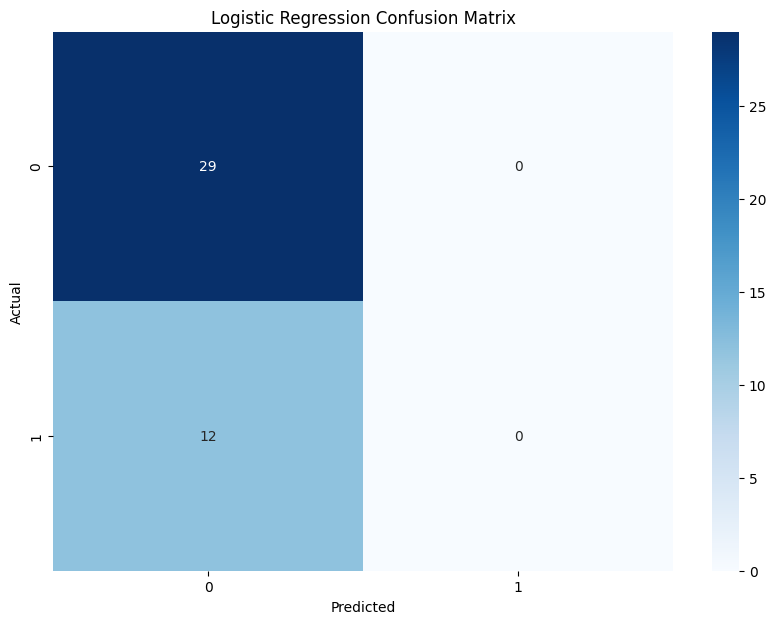

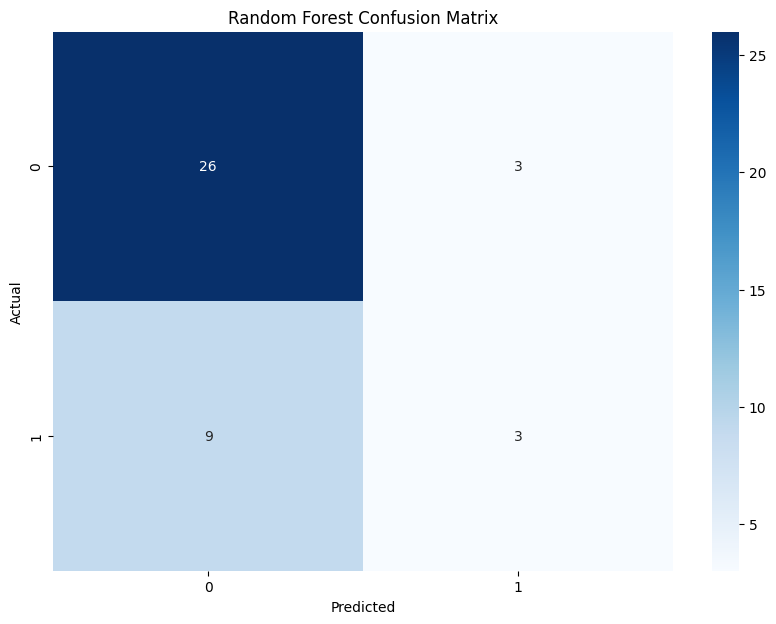

In [93]:

# Visualize Logistic Regression Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(logistic_regression_confusion, annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(random_forest_confusion, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [94]:
from sklearn.metrics import precision_score

# Calculate and print the Positive Predictive Value (PPV) for Logistic Regression
logistic_regression_ppv = precision_score(y_test, logistic_regression_predictions)
print(f"Logistic regression PPV: {logistic_regression_ppv}")

# Calculate and print the Positive Predictive Value (PPV) for Random Forest
random_forest_ppv = precision_score(y_test, random_forest_predictions)
print(f"Random forest PPV: {random_forest_ppv}")


Logistic regression PPV: 0.0
Random forest PPV: 0.5


/Users/konsta/Library/Caches/pypoetry/virtualenvs/data-and-analysis-W6Z4YzTc-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analysing the answers with BERT

In [95]:
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch

# # Load pre-trained model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# # Function to classify a single text
# def classify_text(text):
#     # Tokenize input and truncate to the first 512 tokens
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

#     # Get model output
#     outputs = model(**inputs)

#     # Get predicted probabilities
#     probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

#     # Get predicted class
#     predicted_class = torch.argmax(probs).item()

#     return predicted_class

# # Apply the function to the 'Open_report typo-corrected' column of the DataFrame
# df['Predicted_Class'] = df['Open_report typo-corrected'].apply(classify_text)

# print(df['Predicted_Class'])

In [96]:
# df['Predicted_Class'].value_counts()
